In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import find_peaks
import datetime
from zoneinfo import ZoneInfo
import naa

In [2]:
run_dir = 'BABY_1L_Run_1'
directories = {}
directories['Na22_1']  = f'{run_dir}/Na22_5uCi_Mar2014_20241107/UNFILTERED'
directories['Na22_2']  = f'{run_dir}/Na22_7_33uCi_2May2016_20241121/UNFILTERED'
directories['Na22_3']  = f'{run_dir}/Na22_9_98uCi_29Sep2023_20241121/UNFILTERED'
directories['Cs137_1'] = f'{run_dir}/Cs137_4_66uCi_19Mar2014_20241107/UNFILTERED'
directories['Cs137_2'] = f'{run_dir}/Cs137_5_0uCi_Jan2006_20241121/UNFILTERED'
directories['Cs137_3'] = f'{run_dir}/Cs137_9_38uCi_29Sep2023_20241121/UNFILTERED'
directories['Co60_1']  = f'{run_dir}/Co60_0_872uCi_19Mar14_20241107/UNFILTERED'
directories['Co60_2']  = f'{run_dir}/Co60_1_0uCi_Feb2006_20241121/UNFILTERED'
directories['Co60_3']  = f'{run_dir}/Co60_1_0uCi_Jan2006_20241121/UNFILTERED'
directories['Mn54']  = f'{run_dir}/Mn54_6_27uCi_2May2016_20241107/UNFILTERED'
directories['Ba133'] = f'{run_dir}/Ba133_1uCi_Mar14_20241107/UNFILTERED'

directories['Zirconium'] = f'{run_dir}/Zirconium_20241104_2324/UNFILTERED'
directories['Niobium'] = f'{run_dir}/Niobium_20241107_1628/UNFILTERED'
directories['Background'] = f'{run_dir}/Background_20241108_0027/UNFILTERED'

In [3]:
# decay_lines = {'Ba133':{'energy':[80.9979, 276.3989, 302.8508, 356.0129, 383.8485],
#                          'intensity':[0.329, 0.0716, 0.1834, 0.6205, 0.0894],
#                          'half_life':[10.551*365.25*24*3600]},
#                 'Co60':{'energy':[1173.228, 1332.492],
#                         'intensity':[0.9985, 0.999826],
#                         'half_life':[1925.28*24*3600]},
#                 'Na22':{'energy':[511, 1274.537],
#                         'intensity':[1.80, 0.9994],
#                         'half_life':[2.6018*365.25*24*3600]},
#                 'Cs137':{'energy':[661.657],
#                          'intensity':[0.851],
#                          'half_life':[30.08*365.25*24*3600]},
#                 'Mn54':{'energy':[834.848],
#                         'intensity':[0.99976],
#                         'half_life':[312.20*24*3600]}}
decay_lines = {'Ba133':{'energy':[356.0129],
                         'intensity':[0.6205],
                         'half_life':[10.551*365.25*24*3600],
                         'activity_date':datetime.datetime(2014, 3, 19, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                         'activity':1 * 3.7e4},
                'Co60_1':{'energy':[1173.228, 1332.492],
                        'intensity':[0.9985, 0.999826],
                        'half_life':[1925.28*24*3600],
                        'activity_date':datetime.datetime(2014, 3, 19, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                        'activity':0.872 * 3.7e4},
                # 'Zirconium':{'energy':[909.15], 
                #              'intensity':[0.9904],
                #              'half_life':[78.41 * 3600]},
                # 'Co60_2':{'energy':[1173.228, 1332.492],
                #         'intensity':[0.9985, 0.999826],
                #         'half_life':[1925.28*24*3600],
                #         'activity_date':datetime.datetime(2006, 2, 15, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                #         'activity':1.0 * 3.7e4},
                # 'Co60_3':{'energy':[1173.228, 1332.492],
                #         'intensity':[0.9985, 0.999826],
                #         'half_life':[1925.28*24*3600],
                #         'activity_date':datetime.datetime(2006, 1, 15, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                #         'activity':1.0 * 3.7e4},
                'Na22_1':{'energy':[511, 1274.537],
                        'intensity':[1.80, 0.899],
                        'half_life':[2.6018*365.25*24*3600],
                        'activity_date':datetime.datetime(2014, 3, 19, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                        'activity': 5 * 3.7e4},
                # 'Na22_2':{'energy':[511, 1274.537],
                #         'intensity':[1.80, 0.899],
                #         'half_life':[2.6018*365.25*24*3600],
                #         'activity_date':datetime.datetime(2016, 5, 2, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                #         'activity': 7.33 * 3.7e4},
                # 'Na22_3':{'energy':[511, 1274.537],
                #         'intensity':[1.80, 0.899],
                #         'half_life':[2.6018*365.25*24*3600],
                #         'activity_date':datetime.datetime(2023, 9, 29, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                #         'activity': 9.98 * 3.7e4},
                'Cs137_1':{'energy':[661.657],
                         'intensity':[0.851],
                         'half_life':[30.08*365.25*24*3600],
                         'activity_date':datetime.datetime(2014, 3, 19, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                         'activity':4.66 * 3.7e4},
                # 'Cs137_2':{'energy':[661.657],
                #          'intensity':[0.851],
                #          'half_life':[30.08*365.25*24*3600],
                #          'activity_date':datetime.datetime(2006, 1, 15, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                #          'activity':5.0 * 3.7e4},
                # 'Cs137_3':{'energy':[661.657],
                #          'intensity':[0.851],
                #          'half_life':[30.08*365.25*24*3600],
                #          'activity_date':datetime.datetime(2023, 9, 29, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                #          'activity':9.38 * 3.7e4},
                'Mn54':{'energy':[834.848],
                        'intensity':[0.99976],
                        'half_life':[312.20*24*3600],
                        'activity_date':datetime.datetime(2016, 5, 2, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                        'activity':6.27 * 3.7e4}}

In [4]:
counts = naa.get_compass_counts(directories, savefile=f'{run_dir}/counts.pkl')

In [5]:
counts = naa.subtract_background(counts, directories['Background'])

In [6]:
default_peak_inputs = {'Na22':{'height_factor':0.01, 'prom_factor':0.01, 'width':[10, 200], 'start_index':100},
               'Cs137':{'height_factor':0.01,'prom_factor':0.075, 'width':[10, 150], 'start_index':100},
               'Co60':{'height_factor':0.6,'prom_factor':0.2, 'width':[20, 200], 'start_index':400},
               'Mn54':{'height_factor':0.01,'prom_factor':0.075, 'width':[10, 150], 'start_index':100},
               'Ba133':{'height_factor':0.01,'prom_factor':0.1, 'width':[10, 200], 'start_index':100},
               'Zirconium':{'height_factor':0.01,'prom_factor':0.075, 'width':[10, 100], 'start_index':100},
               'Niobium':{'height_factor':0.01,'prom_factor':0.075, 'width':[10, 150], 'start_index':100},
               'Background':{'height_factor':0.01,'prom_factor':0.075, 'width':[10, 150], 'start_index':100}}
peak_inputs = {}
peak_input_keys = default_peak_inputs.keys()
for sample in counts.keys():
    for pikey in peak_input_keys:
        if pikey in sample:
            peak_inputs[sample] = default_peak_inputs[pikey]
print(peak_inputs)

    


{'Na22_1': {'height_factor': 0.01, 'prom_factor': 0.01, 'width': [10, 200], 'start_index': 100}, 'Na22_2': {'height_factor': 0.01, 'prom_factor': 0.01, 'width': [10, 200], 'start_index': 100}, 'Na22_3': {'height_factor': 0.01, 'prom_factor': 0.01, 'width': [10, 200], 'start_index': 100}, 'Cs137_1': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 150], 'start_index': 100}, 'Cs137_2': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 150], 'start_index': 100}, 'Cs137_3': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 150], 'start_index': 100}, 'Co60_1': {'height_factor': 0.6, 'prom_factor': 0.2, 'width': [20, 200], 'start_index': 400}, 'Co60_2': {'height_factor': 0.6, 'prom_factor': 0.2, 'width': [20, 200], 'start_index': 400}, 'Co60_3': {'height_factor': 0.6, 'prom_factor': 0.2, 'width': [20, 200], 'start_index': 400}, 'Mn54': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 150], 'start_index': 100}, 'Ba133': {'height_factor': 0.01, 'prom_f

635
735
Na22: searched prominence: 2011.5  : [1497 2096] {'peak_heights': array([4023., 3588.]), 'prominences': array([2923., 2754.]), 'left_bases': array([ 586, 1196]), 'right_bases': array([2141, 2141]), 'widths': array([123.48907563, 140.93391703]), 'width_heights': array([2561.5, 2211. ]), 'left_ips': array([ 697.33235294, 1279.21138211]), 'right_ips': array([ 820.82142857, 1420.14529915])}
Na22_1 [np.int64(635), np.int64(1497)]
Na22_1 1 [np.int64(635), np.int64(1497)]
731
831
Na22: searched prominence: 1756.5  : [1728 2422] {'peak_heights': array([3513., 2664.]), 'prominences': array([2707., 2108.]), 'left_bases': array([ 710, 1413]), 'right_bases': array([2555, 2555]), 'widths': array([136.1297305 , 148.66412214]), 'width_heights': array([2159.5, 1610. ]), 'left_ips': array([ 834.296875, 1518.      ]), 'right_ips': array([ 970.4266055 , 1666.66412214])}
Na22_1 [np.int64(731), np.int64(1728)]
Na22_1 2 [np.int64(731), np.int64(1728)]
684
784
Na22: searched prominence: 4964.0  : [16

/var/folders/8l/th_q6c756gb0yy2fvkvdjntr0000gn/T/ipykernel_84114/2609114881.py:17: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax[i].set_ylim(-y_max*0.25, y_max*1.5)


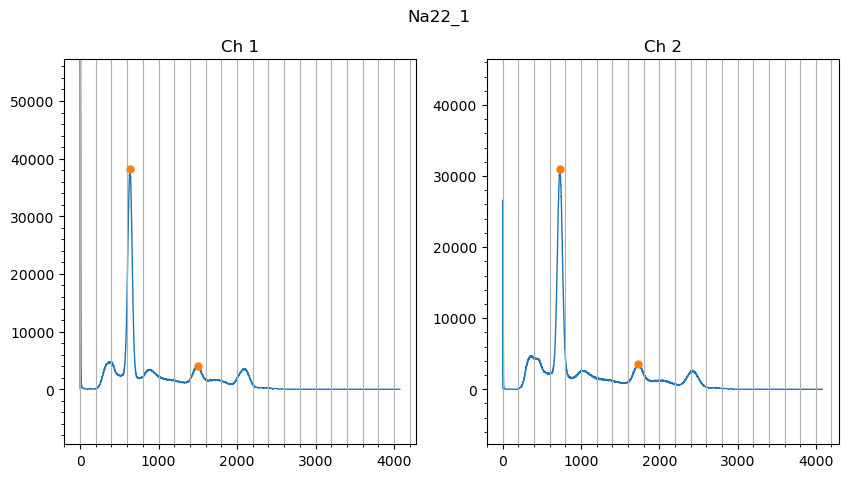

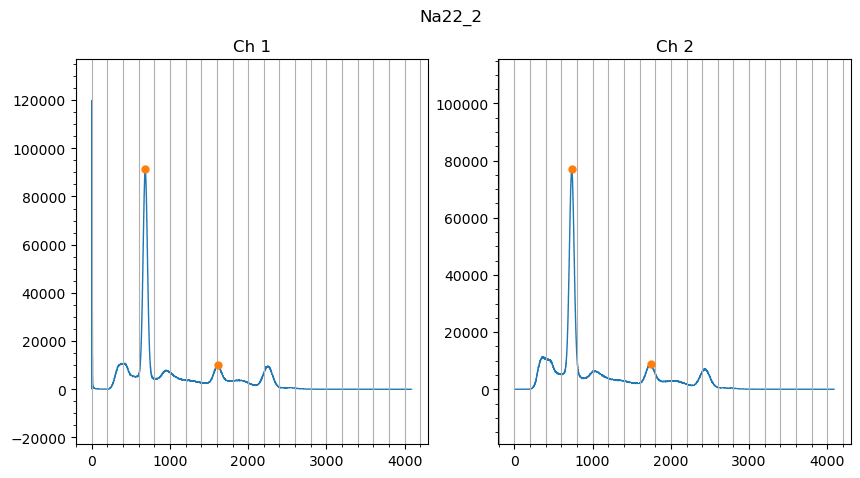

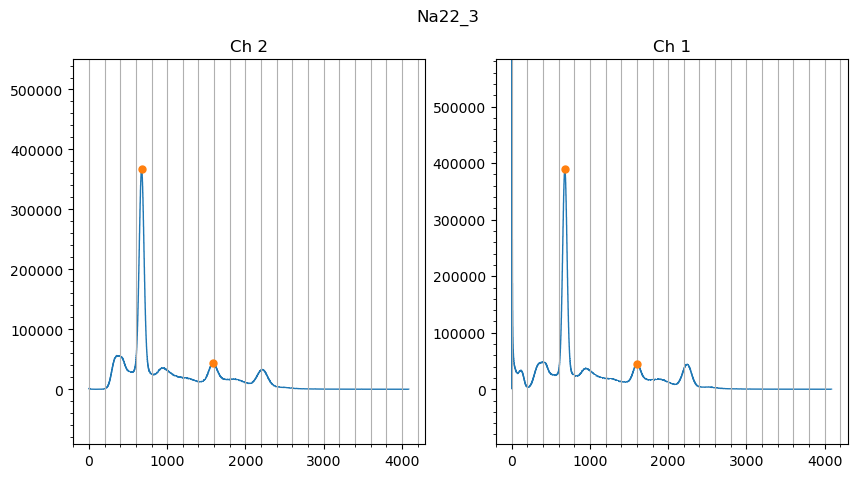

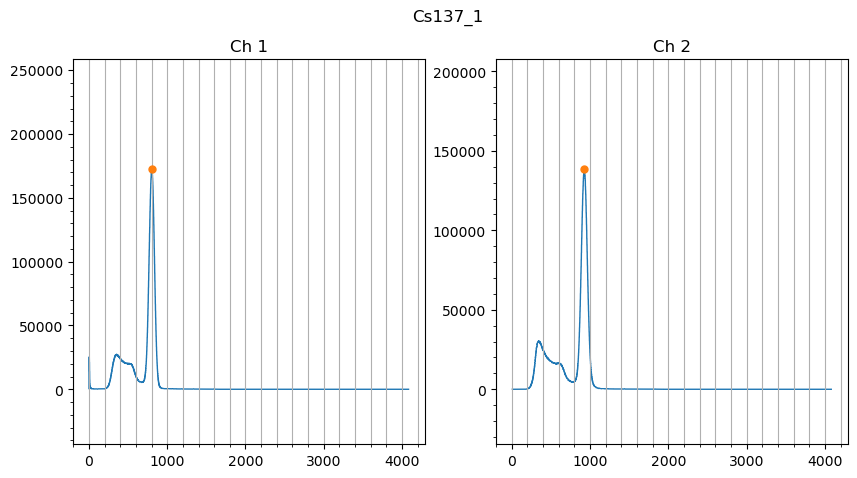

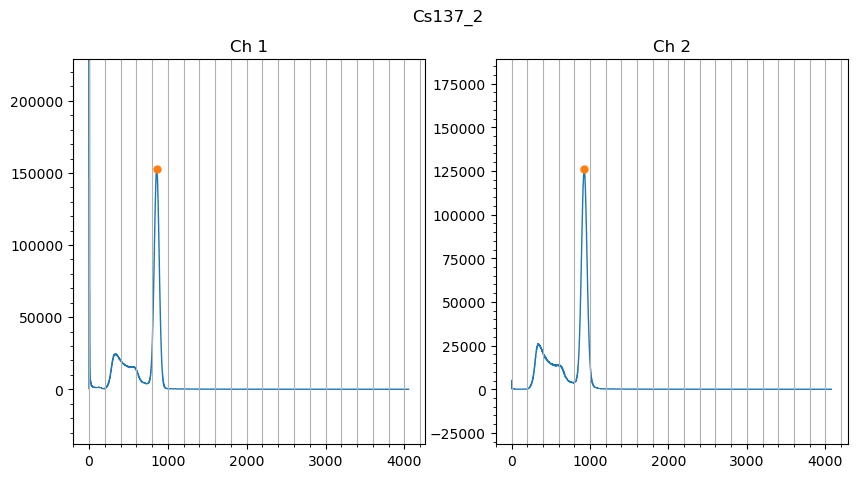

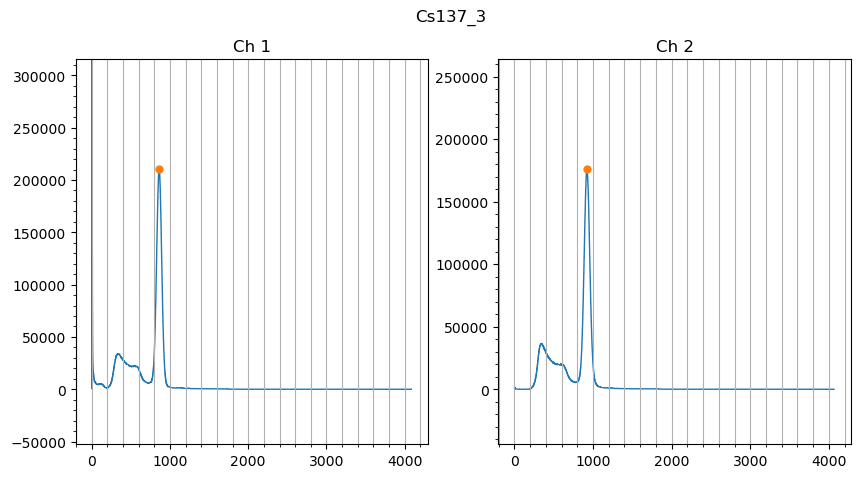

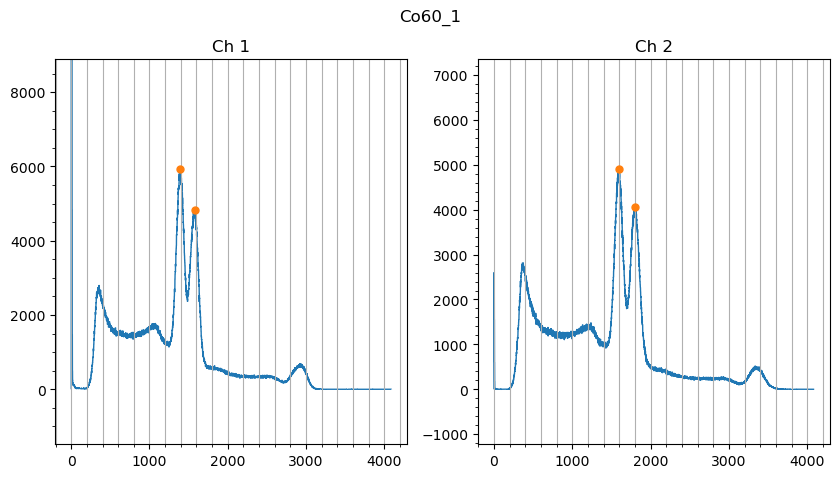

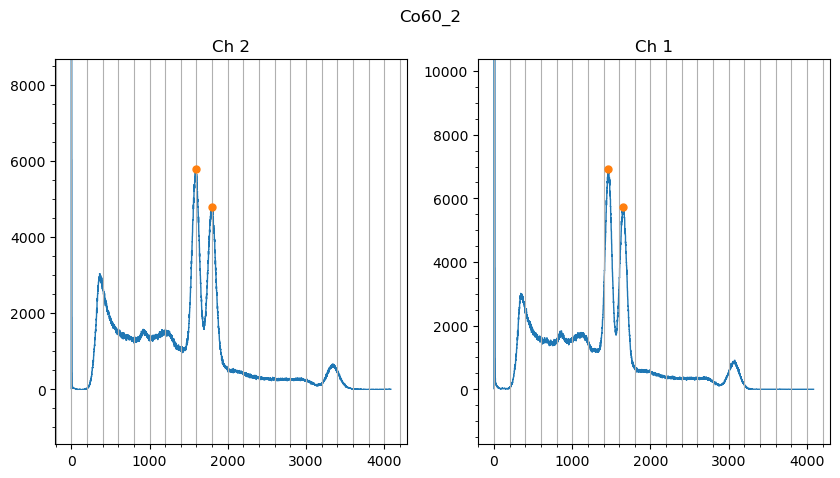

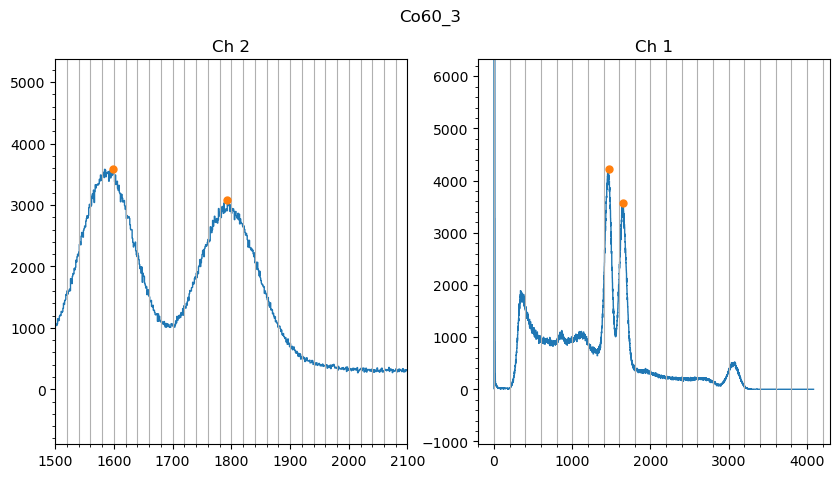

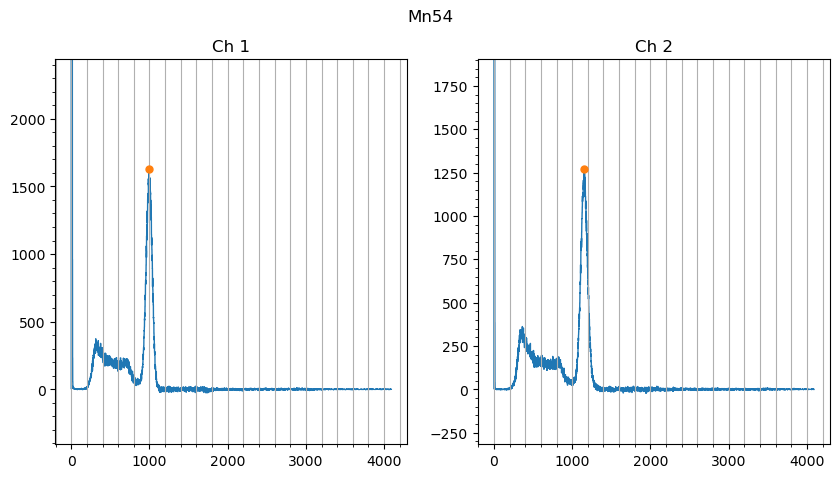

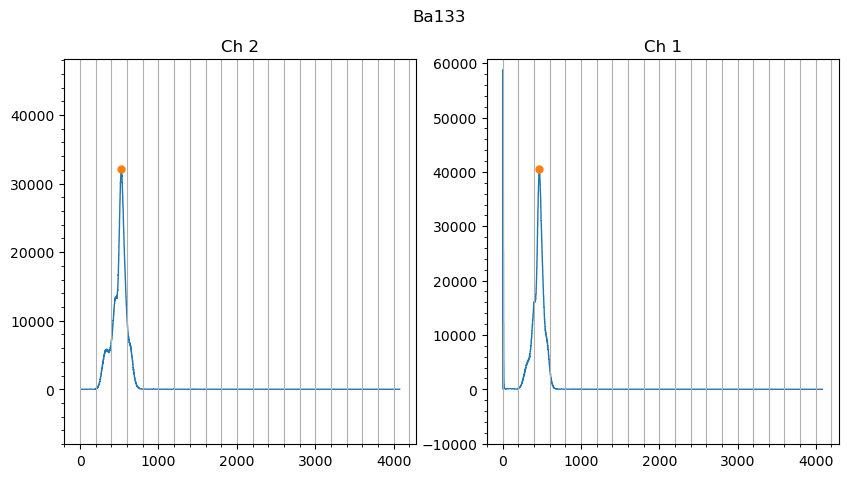

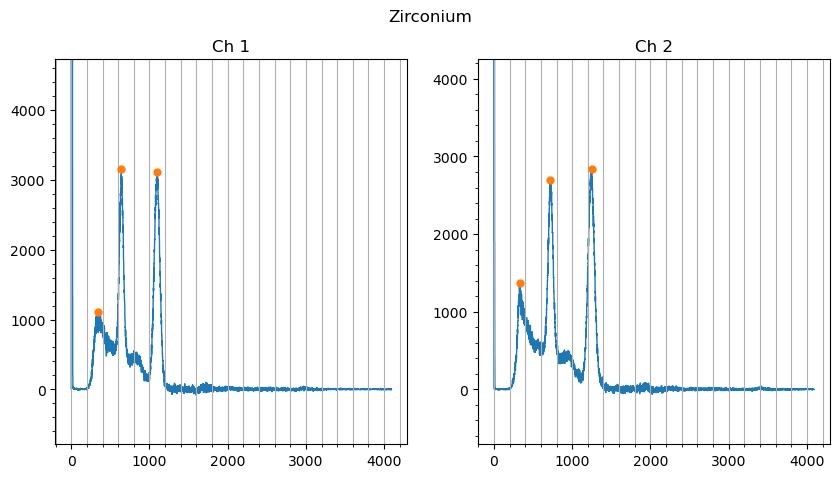

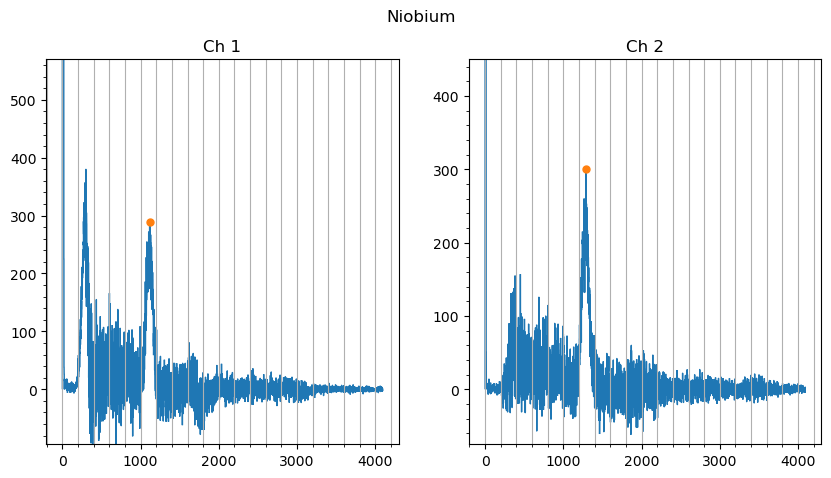

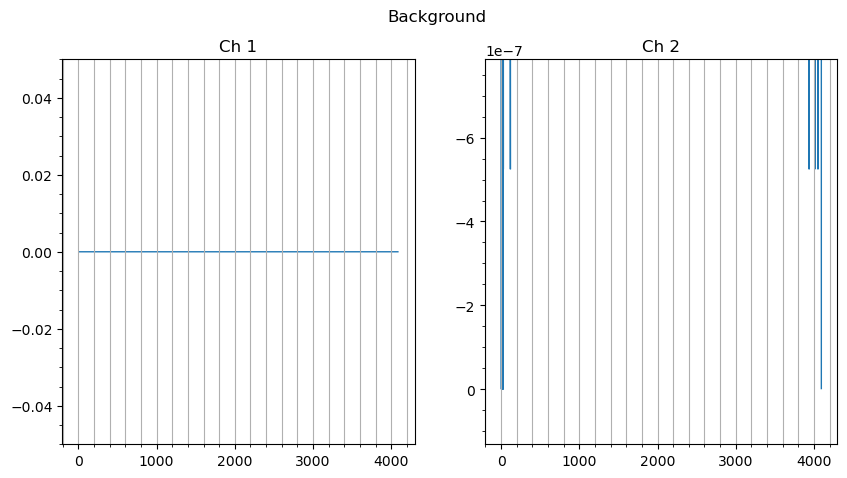

In [7]:

for sample in counts.keys():
    fig, ax = plt.subplots(nrows=1, ncols=len(counts[sample].keys()), figsize=[10, 5])
    for i,ch in enumerate(counts[sample].keys()):
        # peaks, peak_data = find_peaks(counts[sample][ch]['hist'][peak_inputs[sample]['start_index']:],
        #                               height=peak_inputs[sample]['height_factor']*np.max(counts[sample][ch]['hist'][peak_inputs[sample]['start_index']:]),
        #                               prominence=peak_inputs[sample]['prom_factor']*np.max(counts[sample][ch]['hist'][peak_inputs[sample]['start_index']:]),
        #                               width=peak_inputs[sample]['width'])
        peaks = naa.get_peaks(counts[sample][ch]['hist'], sample)
        print(sample, ch, peaks)
        ax[i].stairs(counts[sample][ch]['hist'], counts[sample][ch]['bin_edges'])
        ax[i].plot(peaks, counts[sample][ch]['hist'][peaks], '.', ms=10)
        ax[i].set_title('Ch {}'.format(ch))
        # ax[i].set_yscale('log')
        ax[i].minorticks_on()
        ax[i].xaxis.grid(which='both')
        y_max = np.max(counts[sample][ch]['hist'][peak_inputs[sample]['start_index']:])
        ax[i].set_ylim(-y_max*0.25, y_max*1.5)
        if sample=='Co60_3' and ch==2:
            ax[i].set_xlim(1500, 2100)
    fig.suptitle(sample)

{'Na22_1': {'height_factor': 0.01, 'prom_factor': 0.01, 'width': [10, 200], 'start_index': 100}, 'Na22_2': {'height_factor': 0.01, 'prom_factor': 0.01, 'width': [10, 200], 'start_index': 100}, 'Na22_3': {'height_factor': 0.01, 'prom_factor': 0.01, 'width': [10, 200], 'start_index': 100}, 'Cs137_1': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 150], 'start_index': 100}, 'Cs137_2': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 150], 'start_index': 100}, 'Cs137_3': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 150], 'start_index': 100}, 'Co60_1': {'height_factor': 0.6, 'prom_factor': 0.2, 'width': [20, 200], 'start_index': 400}, 'Co60_2': {'height_factor': 0.6, 'prom_factor': 0.2, 'width': [20, 200], 'start_index': 400}, 'Co60_3': {'height_factor': 0.6, 'prom_factor': 0.2, 'width': [20, 200], 'start_index': 400}, 'Mn54': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 150], 'start_index': 100}, 'Ba133': {'height_factor': 0.01, 'prom_f

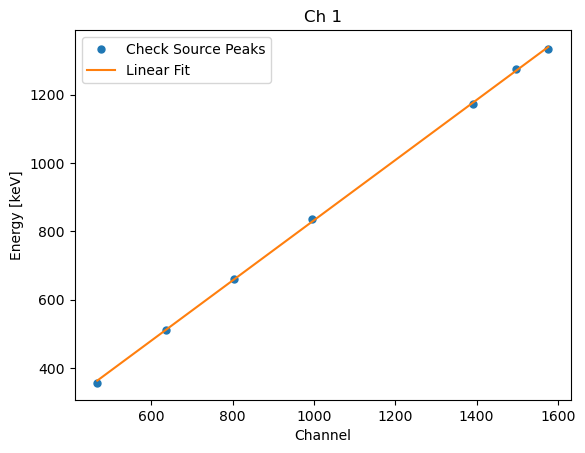

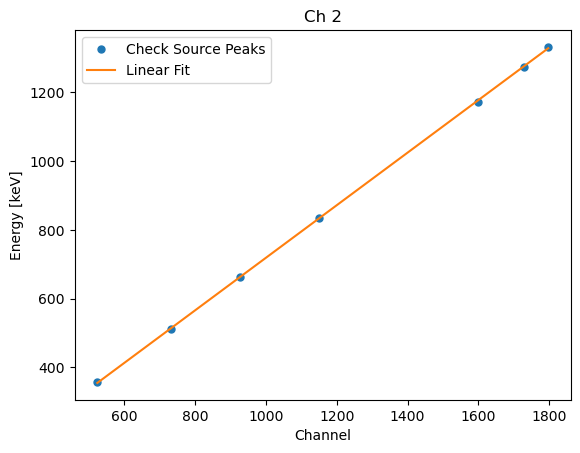

In [8]:
counts, coeff = naa.calibrate_counts(counts, peak_inputs=peak_inputs, decay_lines=decay_lines, plot_calibration=True)

In [9]:
# decay_lines['Ba133']['energy'] = [276.3989, 302.8508, 356.0129, 383.8485]
# decay_lines['Ba133']['intensity'] = [0.0716, 0.1834, 0.6205, 0.0894]


# for source in decay_lines.keys():
#     for ch in counts[source].keys():
#         print(source, ch, decay_lines[source]['energy'])
#         naa.get_peak_areas(counts[source][ch]['hist'],
#                             counts[source][ch]['calibrated_bin_edges'],
#                             decay_lines[source]['energy'],
#                             overlap_width=200,
#                             search_width=300,
#                             plot=True)
#         if source=='Zirconium':
#             plt.title('Zirconium Foil Gamma Spectrum')
#             plt.xlim(0, 1500)

In [10]:
for source in counts.keys():
    for ch in counts[source].keys():
        print(source, ' Ch ', ch, ' Dead Time: ', (counts[source][ch]['live_count_time']
                                                   / counts[source][ch]['real_count_time']))

Na22_1  Ch  1  Dead Time:  0.8956648543909121
Na22_1  Ch  2  Dead Time:  0.9916233573823324
Na22_2  Ch  1  Dead Time:  0.94172333610709
Na22_2  Ch  2  Dead Time:  0.9816932062219547
Na22_3  Ch  2  Dead Time:  0.7656552453345433
Na22_3  Ch  1  Dead Time:  0.5553818743417575
Cs137_1  Ch  1  Dead Time:  0.9338852201965263
Cs137_1  Ch  2  Dead Time:  0.9547759375994587
Cs137_2  Ch  1  Dead Time:  0.7482232453662739
Cs137_2  Ch  2  Dead Time:  0.9624819408409444
Cs137_3  Ch  1  Dead Time:  0.6772985489862895
Cs137_3  Ch  2  Dead Time:  0.8696353307678211
Co60_1  Ch  1  Dead Time:  0.898008905597995
Co60_1  Ch  2  Dead Time:  0.995851608918041
Co60_2  Ch  2  Dead Time:  0.9975245773809133
Co60_2  Ch  1  Dead Time:  0.8066871368502787
Co60_3  Ch  2  Dead Time:  0.9974096488850289
Co60_3  Ch  1  Dead Time:  0.8135929124231747
Mn54  Ch  1  Dead Time:  0.7769391512964822
Mn54  Ch  2  Dead Time:  0.9995907471243073
Ba133  Ch  2  Dead Time:  0.9929385550751287
Ba133  Ch  1  Dead Time:  0.933074344

Cs137_1  Ch  1
[(661.657,)]
[np.float64(12367054.416486802)]
Peak areas:  [np.float64(12367054.416486802)]
Activity measured:  [25930.02513674]
decay constant:  [7.30203083e-10]
count time:  335760178.838
Activity expected:  [134930.55560589]
efficiency:  [0.19217311]
Cs137_1  Ch  2
[(661.657,)]
[np.float64(9617942.397430494)]
Peak areas:  [np.float64(9617942.397430494)]
Activity measured:  [19724.72126002]
decay constant:  [7.30203083e-10]
count time:  335760178.838
Activity expected:  [134930.55560589]
efficiency:  [0.14618424]
Co60_1  Ch  1
[(1173.228, 1332.492)]
[np.float64(509739.53945992776), np.float64(457308.90970611625)]
Peak areas:  [np.float64(509739.53945992776), np.float64(457308.90970611625)]
Activity measured:  [631.57508293 565.8612718 ]
decay constant:  [4.16694549e-09]
count time:  335767641.127
Activity expected:  [7963.16552525]
efficiency:  [0.07931206 0.07105984]
Co60_1  Ch  2
[(1173.228, 1332.492)]
[np.float64(389728.05053422204), np.float64(364060.75189070613)]


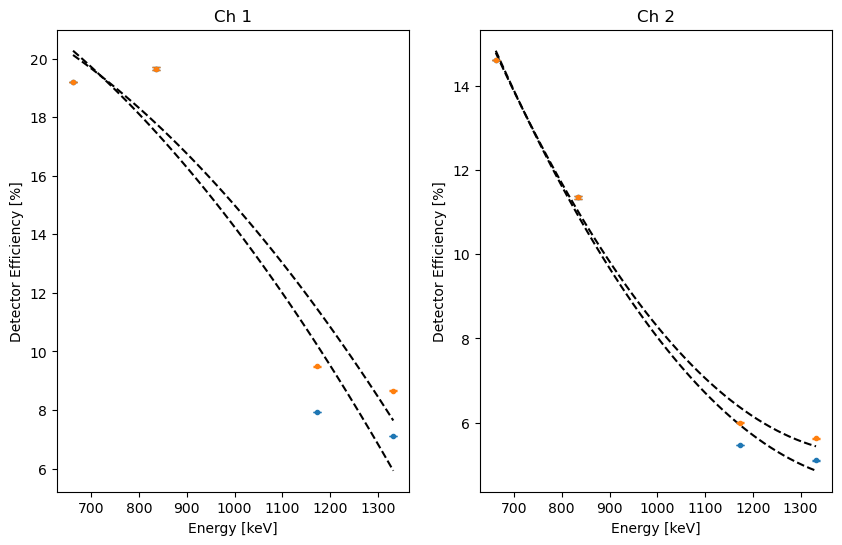

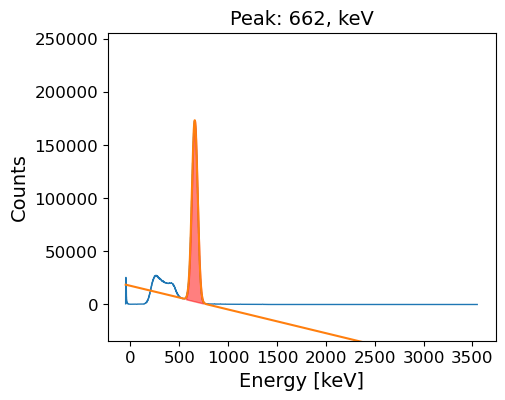

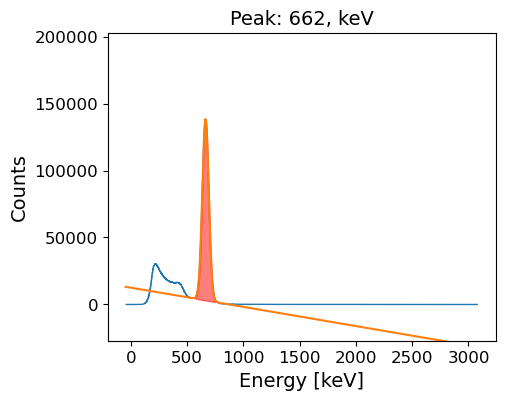

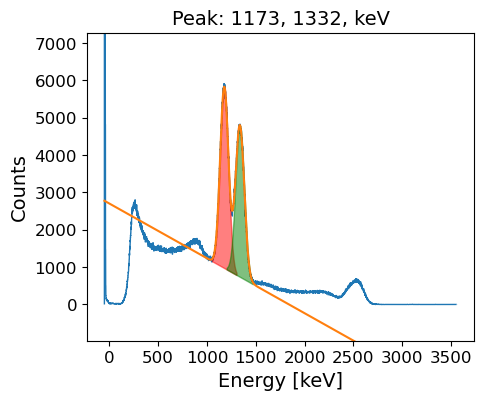

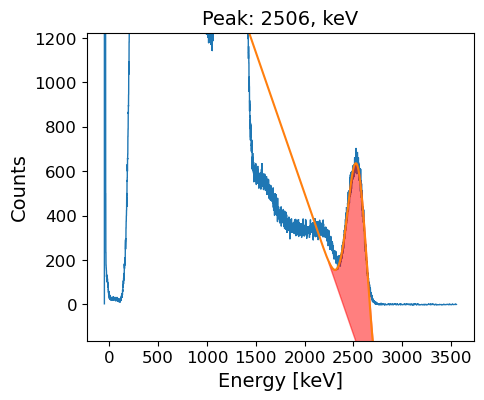

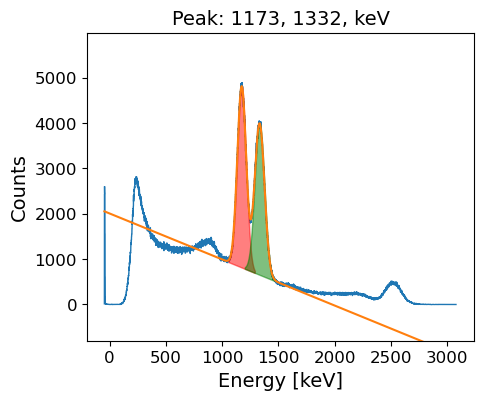

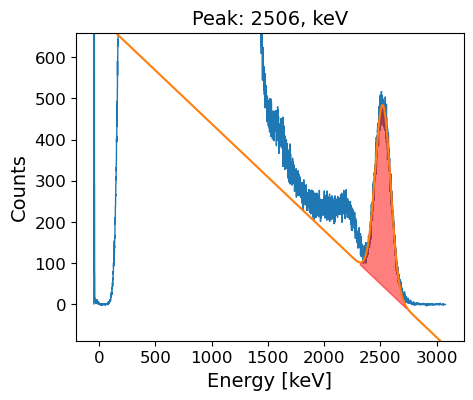

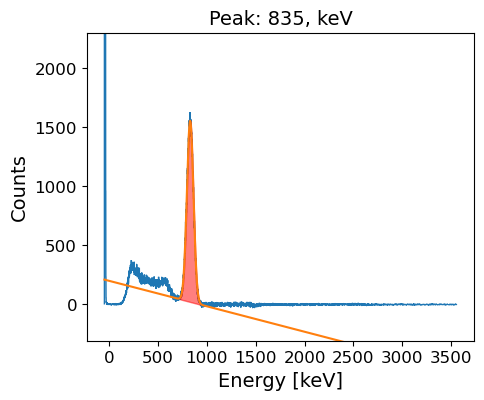

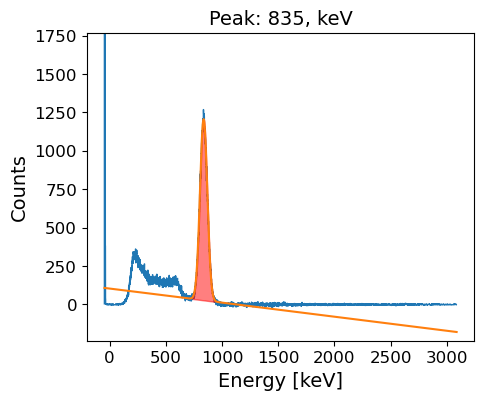

In [17]:
nuclides = [ 'Cs137_1',
             'Co60_1', 
            'Mn54']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[10,6])
effs, eff_errs, eff_coeff = naa.energy_efficiency(counts, decay_lines, nuclides=nuclides,
                      plot_eff=True, plot_areas=False,
                      overlap_width=200, search_width=300,
                      degree=2, count_sum_peak=False, ax_eff=ax)
effs, eff_errs, eff_coeff = naa.energy_efficiency(counts, decay_lines, nuclides=nuclides,
                      plot_eff=True, plot_areas=True,
                      overlap_width=200, search_width=300,
                      degree=2, count_sum_peak=True, ax_eff=ax)

Text(0.5, 1.0, 'Niobium Ch 1')

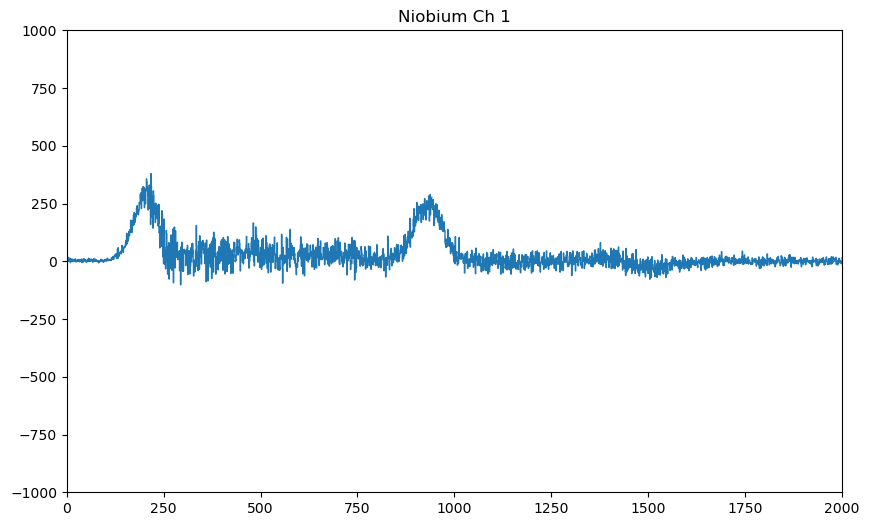

In [18]:
fig, ax = plt.subplots(figsize=[10, 6])
ax.stairs(counts['Niobium'][1]['hist'], counts['Niobium'][1]['calibrated_bin_edges'])
ax.set_xlim(0, 2000)
ax.set_ylim(-1e3, 1e3)
ax.set_title('Niobium Ch 1')


Text(0.5, 1.0, 'Zirconium Ch 1')

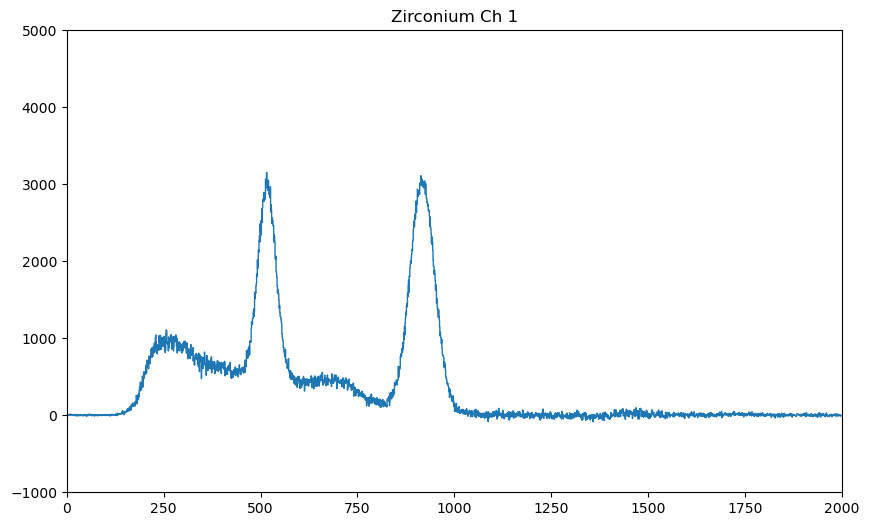

In [19]:
fig, ax = plt.subplots(figsize=[10, 6])
ax.stairs(counts['Zirconium'][1]['hist'], counts['Zirconium'][1]['calibrated_bin_edges'])
ax.set_xlim(0, 2000)
ax.set_ylim(-1e3, 5e3)
ax.set_title('Zirconium Ch 1')

In [20]:
import sys
sys.path.append('../libra-toolbox/')
import libra_toolbox.neutron_detection.activation_foils as lib
print(lib.__file__)
print(lib.settings.ureg)

/Users/collin/Documents/LIBRA/activation_foils/../libra-toolbox/libra_toolbox/neutron_detection/activation_foils/__init__.py


In [21]:
foil = {'nuclide':'Nb93',
        'mass':0.2733 * lib.settings.ureg.g,
        'thickness': 0.01 * lib.settings.ureg.inch,
        'reactions':{'(n,2n)m':
                        {'branching_ratio': 0.9915,
                        'photon_energy': 934.44,
                        'half_life': 10.15 * lib.settings.ureg.day}}
}

flux = {}

for ch in counts['Niobium'].keys():
        experiment = {
                "foil_name": f"Nb_Ch{ch}",
                "generator": "A325",
                "run": 1,
                "time_generator_off": datetime.datetime(2024, 11, 4, 22, 14, 0, 0, ZoneInfo('America/New_York')),
                "start_time_counting": counts['Niobium'][ch]['start_time'],
                "real_count_time": counts['Niobium'][ch]['real_count_time'] * lib.settings.ureg.second,
                "live_count_time": counts['Niobium'][ch]['live_count_time'] * lib.settings.ureg.second,
                "distance_from_center_of_target_plane": 5.08 * lib.settings.ureg.cm
        }
        irradiations = [
        {"t_on": 0, "t_off": 12 * lib.settings.ureg.h}
        ]
        for reaction in foil['reactions'].keys():
                foil['reactions'][reaction]['decay_constant'] = (np.log(2) / foil['reactions'][reaction]['half_life']).to(1/lib.settings.ureg.second)
                experiment[reaction] = {}
                experiment[reaction]['photon_counts'] = naa.get_peak_areas(counts['Niobium'][ch]['hist'], 
                                                                counts['Niobium'][ch]['calibrated_bin_edges'],
                                                                [foil['reactions'][reaction]['photon_energy']],
                                                                plot=False) * lib.settings.ureg.count
                experiment[reaction]['photon_counts_uncertainty'] = np.sqrt(experiment[reaction]['photon_counts']) * lib.settings.ureg.count

                experiment[reaction]['efficiency'] = np.polyval(eff_coeff[ch], foil['reactions'][reaction]['photon_energy'])
                print(foil['reactions'][reaction]['branching_ratio'])
                flux[ch] = lib.explicit.get_neutron_flux(experiment, irradiations, foil, reaction).to(1/lib.settings.ureg.s)
                print('Ch {} Flux: {:.3e}\n'.format(ch, flux[ch]))
print('Mean Flux: {:.3e}'.format(np.mean([flux[1], flux[2]])))

[(934.44,)]
[np.float64(21507.138056451055)]
0.9915
inside get_neutron_flux()
efficiency 0.16038409098675283 count / particle
number of decays measured [134097.70211078774] particle
number 1.7714744424951702e+21 particle
cross section 0.4729 barn
att coeff 0.05866 centimeter ** 2 / gram
density 8.582 gram / centimeter ** 3
thickness 0.01 inch
flux:  [1.6007264855581683e-16] / barn
f_time 740.0007882118293 second
f_self 0.9936337282641114 dimensionless
Ch 1 Flux: [7.060e+07] / second

[(934.44,)]
[np.float64(18862.982504858803)]
0.9915
inside get_neutron_flux()
efficiency 0.091810812596823 count / particle
number of decays measured [205454.9128945574] particle
number 1.7714744424951702e+21 particle
cross section 0.4729 barn
att coeff 0.05866 centimeter ** 2 / gram
density 8.582 gram / centimeter ** 3
thickness 0.01 inch
flux:  [2.4525186895943636e-16] / barn
f_time 896.9331814599811 second
f_self 0.9936337282641114 dimensionless
Ch 2 Flux: [8.924e+07] / second

Total Flux: 7.992e+07


/Users/collin/anaconda3/envs/libra/lib/python3.12/site-packages/numpy/_core/_methods.py:119: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  arr = asanyarray(a)


In [23]:
foil = {'nuclide':'Zr90',
        'mass':0.9036 * lib.settings.ureg.g,
        'thickness': 0.005 * 8 * lib.settings.ureg.inch,
        'reactions':{'(n,2n)':
                        {'branching_ratio': 0.9904,
                        'photon_energy': 909.15,
                        'half_life': 78.41 * lib.settings.ureg.hour}}
}

flux = {}

for ch in counts['Zirconium'].keys():
        experiment = {
                "foil_name": f"Zr_Ch{ch}",
                "generator": "A325",
                "run": 1,
                "time_generator_off": datetime.datetime(2024, 11, 4, 22, 14, 0, 0, ZoneInfo('America/New_York')),
                "start_time_counting": counts['Zirconium'][ch]['start_time'],
                "real_count_time": counts['Zirconium'][ch]['real_count_time'] * lib.settings.ureg.second,
                "live_count_time": counts['Zirconium'][ch]['live_count_time'] * lib.settings.ureg.second,
                "distance_from_center_of_target_plane": 5.08 * lib.settings.ureg.cm
        }
        irradiations = [
        {"t_on": 0, "t_off": 12 * lib.settings.ureg.h}
        ]
        for reaction in foil['reactions'].keys():
                foil['reactions'][reaction]['decay_constant'] = (np.log(2) / foil['reactions'][reaction]['half_life']).to(1/lib.settings.ureg.second)
                experiment[reaction] = {}
                experiment[reaction]['photon_counts'] = naa.get_peak_areas(counts['Zirconium'][ch]['hist'], 
                                                                counts['Zirconium'][ch]['calibrated_bin_edges'],
                                                                [foil['reactions'][reaction]['photon_energy']],
                                                                plot=False) * lib.settings.ureg.count
                experiment[reaction]['photon_counts_uncertainty'] = np.sqrt(experiment[reaction]['photon_counts']) * lib.settings.ureg.count

                experiment[reaction]['efficiency'] = np.polyval(eff_coeff[ch], foil['reactions'][reaction]['photon_energy'])
                print(foil['reactions'][reaction]['branching_ratio'])
                flux[ch] = lib.explicit.get_neutron_flux(experiment, irradiations, foil, reaction).to(1/lib.settings.ureg.s)
                print('Ch {} Flux: {:.3e}\n'.format(ch, flux[ch]))
print('Mean Flux: {:.3e}'.format(np.mean([flux[1], flux[2]])))

[(909.15,)]
[np.float64(224669.9285146186)]
0.9904
inside get_neutron_flux()
efficiency 0.16447792687616694 count / particle
number of decays measured [1365957.929928004] particle
number 3.069041512354476e+21 particle
cross section 0.5068 barn
att coeff 0.0581 centimeter ** 2 / gram
density 6.505 gram / centimeter ** 3
thickness 0.04 inch
flux:  [8.782091440147842e-16] / barn
f_time 3602.07984954911 second
f_self 0.9810440255969383 dimensionless
Ch 1 Flux: [8.059e+07] / second

[(909.15,)]
[np.float64(198281.69331364898)]
0.9904
inside get_neutron_flux()
efficiency 0.09580067745324143 count / particle
number of decays measured [2069731.64057662] particle
number 3.069041512354476e+21 particle
cross section 0.5068 barn
att coeff 0.0581 centimeter ** 2 / gram
density 6.505 gram / centimeter ** 3
thickness 0.04 inch
flux:  [1.330683187663702e-15] / barn
f_time 3881.5970341124357 second
f_self 0.9810440255969383 dimensionless
Ch 2 Flux: [1.133e+08] / second

Mean Flux: 9.696e+07


/Users/collin/anaconda3/envs/libra/lib/python3.12/site-packages/numpy/_core/_methods.py:119: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  arr = asanyarray(a)


In [24]:
foil = {'nuclide':'Zr90',
        'mass':0.9036  * lib.settings.ureg.g,
        'thickness': 0.005 * 8 * lib.settings.ureg.inch,
        'reactions':{'(n,2n)':
                        {'branching_ratio': 0.45,
                        'photon_energy': 511.,
                        'half_life': 78.41 * lib.settings.ureg.hour}}
}

flux = {}

for ch in counts['Zirconium'].keys():
        experiment = {
                "foil_name": f"Zr_Ch{ch}",
                "generator": "A325",
                "run": 1,
                "time_generator_off": datetime.datetime(2024, 11, 4, 22, 14, 0, 0, ZoneInfo('America/New_York')),
                "start_time_counting": counts['Zirconium'][ch]['start_time'],
                "real_count_time": counts['Zirconium'][ch]['real_count_time'] * lib.settings.ureg.second,
                "live_count_time": counts['Zirconium'][ch]['live_count_time'] * lib.settings.ureg.second,
                "distance_from_center_of_target_plane": 5.08 * lib.settings.ureg.cm
        }
        irradiations = [
        {"t_on": 0, "t_off": 12 * lib.settings.ureg.h}
        ]
        for reaction in foil['reactions'].keys():
                foil['reactions'][reaction]['decay_constant'] = (np.log(2) / foil['reactions'][reaction]['half_life']).to(1/lib.settings.ureg.second)
                experiment[reaction] = {}
                experiment[reaction]['photon_counts'] = naa.get_peak_areas(counts['Zirconium'][ch]['hist'], 
                                                                counts['Zirconium'][ch]['calibrated_bin_edges'],
                                                                [foil['reactions'][reaction]['photon_energy']],
                                                                plot=False) * lib.settings.ureg.count
                experiment[reaction]['photon_counts_uncertainty'] = np.sqrt(experiment[reaction]['photon_counts']) * lib.settings.ureg.count

                experiment[reaction]['efficiency'] = np.polyval(eff_coeff[ch], foil['reactions'][reaction]['photon_energy'])
                print(foil['reactions'][reaction]['branching_ratio'])
                flux[ch] = lib.explicit.get_neutron_flux(experiment, irradiations, foil, reaction).to(1/lib.settings.ureg.s)
                print('Ch {} Flux: {:.3e}\n'.format(ch, flux[ch]))
print('Mean Flux: {:.3e}'.format(np.mean([flux[1], flux[2]])))

[(511.0,)]
[np.float64(137317.8966884641)]
0.45
inside get_neutron_flux()
efficiency 0.09742392949864777 count / particle
number of decays measured [1409488.381295173] particle
number 3.069041512354476e+21 particle
cross section 0.5068 barn
att coeff 0.0581 centimeter ** 2 / gram
density 6.505 gram / centimeter ** 3
thickness 0.04 inch
flux:  [9.061959799166434e-16] / barn
f_time 3602.07984954911 second
f_self 0.9810440255969383 dimensionless
Ch 1 Flux: [8.316e+07] / second

[(511.0,)]
[np.float64(123174.95068387165)]
0.45
inside get_neutron_flux()
efficiency 0.08485435018642215 count / particle
number of decays measured [1451604.430571449] particle
number 3.069041512354476e+21 particle
cross section 0.5068 barn
att coeff 0.0581 centimeter ** 2 / gram
density 6.505 gram / centimeter ** 3
thickness 0.04 inch
flux:  [9.33273460689534e-16] / barn
f_time 3881.5970341124357 second
f_self 0.9810440255969383 dimensionless
Ch 2 Flux: [7.948e+07] / second

Mean Flux: 8.132e+07


/Users/collin/anaconda3/envs/libra/lib/python3.12/site-packages/numpy/_core/_methods.py:119: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  arr = asanyarray(a)
